# Data Visualization Techniques  
 ### Heitor Gomes de Araujo Filho (2023098)
 ### Lecturer Name: David McQuaid
 
Link GitHub: https://github.com/heitorgaf/Board_Games_CA1_DVis.git

## Introduction

The dataset contains information about board game names, publication years, average user ratings, user counts, game genres, mechanics, and much more. This data makes it possible to analyze trends, patterns, and the popularity of various board games thoroughly. In order to add the visual appeal of games while maintaining the necessary level of business seriousness, a relationship between colors and typography will be constructed as part of a project that intends to visually examine this dataset.

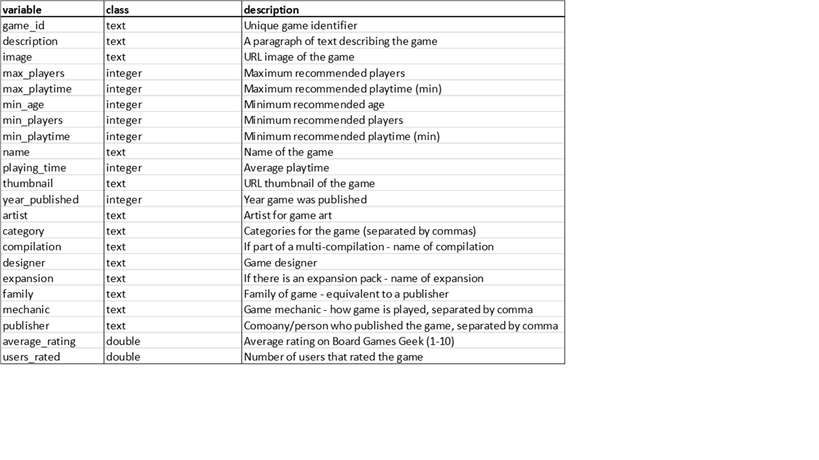

In [1]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
from collections import Counter

#for visualistions
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# sns.set_style("darkgrid")
sns.set_palette(palette='Paired')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from PIL import Image
from os import path
from wordcloud import WordCloud

import altair as alt

import warnings
warnings.simplefilter("ignore")

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("board_games.csv", na_values = missing_value_formats)

## Data Understanding

### EDA

In [3]:
df.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

In [4]:
df.shape
print('Number of Rows: ', 10532) 
print('Number of Features: ', 22) 

Number of Rows:  10532
Number of Features:  22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [6]:
df.describe()

game_id   max_players  max_playtime       min_age   min_players  \
count   10532.000000  10532.000000  10532.000000  10532.000000  10532.000000   
mean    62059.203095      5.657330     91.341436      9.714964      2.070547   
std     66223.716828     18.884403    659.754400      3.451226      0.664394   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      5444.500000      4.000000     30.000000      8.000000      2.000000   
50%     28822.500000      4.000000     45.000000     10.000000      2.000000   
75%    126409.500000      6.000000     90.000000     12.000000      2.000000   
max    216725.000000    999.000000  60000.000000     42.000000      9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count  10532.000000  10532.000000    10532.000000    10532.000000   
mean      80.882738     91.341436     2003.070832        6.370856   
std      637.873893    659.754400       12.278296        0.850364   
min        0.000000      0.000000     1950.000000        1.384210   
25%       25.000000     30.000000     1998.000000        5.829585   
50%       45.000000     45.000000     2007.000000        6.392965   
75%       90.000000     90.000000     2012.000000        6.942675   
max    60000.000000  60000.000000     2016.000000        9.003920   

        users_rated  
count  10532.000000  
mean     870.081466  
std     2880.214998  
min       50.000000  
25%       85.000000  
50%      176.000000  
75%      518.000000  
max    67655.000000

> The statistic summary for "max_playtime" and "playing_time" is the same. "min_playtime" is also very similar.

In [7]:
df.describe(include = 'object').T

count unique                                                top  \
description  10532  10528  How could that have happened? Black Stories ar...   
image        10531  10527       //cf.geekdo-images.com/images/pic2410035.png   
name         10532  10357                                         Robin Hood   
thumbnail    10531  10527     //cf.geekdo-images.com/images/pic2410035_t.png   
artist        7759   4641                                    Franz Vohwinkel   
category     10438   3860                               Wargame,World War II   
compilation    410    336           Traveller: The Classic Games, Games 1-6+   
designer     10406   4678                                       (Uncredited)   
expansion     2752   2634  Règlement de l'An XXX,Regulations of the Year ...   
family        7724   3918                          Crowdfunding: Kickstarter   
mechanic      9582   3209                                    Hex-and-Counter   
publisher    10529   5512                                          GMT Games   

            freq  
description    3  
image          2  
name           5  
thumbnail      2  
artist       166  
category     449  
compilation    8  
designer     558  
expansion      7  
family       391  
mechanic     523  
publisher    180

> As seen above, checking for duplicates is necessary.

In [8]:
df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [9]:
df.T.duplicated()

game_id           False
description       False
image             False
max_players       False
max_playtime      False
min_age           False
min_players       False
min_playtime      False
name              False
playing_time       True
thumbnail         False
year_published    False
artist            False
category          False
compilation       False
designer          False
expansion         False
family            False
mechanic          False
publisher         False
average_rating    False
users_rated       False
dtype: bool

> I noticed that the "max_playtime" and "playing_time" columns are the same, so I decided to test it out.

In [10]:
df['max_playtime'].equals(df['playing_time'])

True

In [11]:
df_time = df[df['max_playtime'] == df['min_playtime']]
df_time.shape

(8967, 22)

> More than 80% of the data is the same. This can lead to bias and inconsistency in the final results if I want to make any predictions.

In [12]:
# Checking the total of unique values in the columns "game_id", "description" and "name"

df['game_id'].nunique()
print('There are a total of ' + (str(df['game_id'].nunique()) + ' unique values in the "game_id" variable.'))

df['description'].nunique()
print('There are a total of ' + (str(df['description'].nunique()) + ' unique values in the "description" variable.'))

df['name'].nunique()
print('There are a total of ' + (str(df['name'].nunique()) + ' unique values in the "name" variable.'))

There are a total of 10532 unique values in the "game_id" variable.
There are a total of 10528 unique values in the "description" variable.
There are a total of 10357 unique values in the "name" variable.


In [13]:
# Observing the duplicated values in "description"

desc = df['description']
df[desc.isin(desc[desc.duplicated()])]

game_id                                        description  \
4611    20750  How could that have happened? Black Stories ar...   
6135    41311  How could that have happened? Black Stories ar...   
6501    60464  How could that have happened? Black Stories ar...   
7839   124839  Hoplomachus [ha-ploh-ma-kuss], or &quot;Hoplo&...   
8318   139131  Hoplomachus [ha-ploh-ma-kuss], or &quot;Hoplo&...   
9703   174584  The award winning game Orcs Must Die has made ...   
9706   174646  The award winning game Orcs Must Die has made ...   

                                             image  max_players  max_playtime  \
4611   //cf.geekdo-images.com/images/pic101661.jpg           15            20   
6135   //cf.geekdo-images.com/images/pic450386.jpg           15            45   
6501   //cf.geekdo-images.com/images/pic629013.jpg           15            20   
7839  //cf.geekdo-images.com/images/pic1311902.jpg            3            60   
8318  //cf.geekdo-images.com/images/pic1608871.jpg            2            30   
9703  //cf.geekdo-images.com/images/pic2455164.jpg            8           150   
9706  //cf.geekdo-images.com/images/pic2469290.jpg            8           150   

      min_age  min_players  min_playtime  \
4611       12            2            20   
6135       14            2            45   
6501       12            2            20   
7839       12            1            60   
8318       12            1            30   
9703       14            1            60   
9706       14            1            60   

                                                  name  playing_time  ...  \
4611                                   Black Stories 2            20  ...   
6135                                   Black Stories 4            45  ...   
6501                                   Black Stories 5            20  ...   
7839                      Hoplomachus: The Lost Cities            60  ...   
8318                         Hoplomachus: Rise of Rome            30  ...   
9703      Orcs Must Die! The Board Game: Order Edition           150  ...   
9706  Orcs Must Die! The Board Game: Unchained Edition           150  ...   

                             artist  \
4611               Bernhard Skopnik   
6135  Holger Bösch,Bernhard Skopnik   
6501               Bernhard Skopnik   
7839                Josh J. Carlson   
8318                            NaN   
9703                   Rich Fleider   
9706                   Rich Fleider   

                                               category        compilation  \
4611  Card Game,Deduction,Horror,Humor,Murder/Myster...  Black Stories 1+2   
6135  Card Game,Deduction,Horror,Humor,Murder/Myster...                NaN   
6501  Card Game,Deduction,Horror,Humor,Murder/Myster...                NaN   
7839                                      Dice,Fighting                NaN   
8318                                      Dice,Fighting                NaN   
9703       Fantasy,Fighting,Miniatures,Video Game Theme                NaN   
9706                  Fantasy,Fighting,Video Game Theme                NaN   

                          designer  \
4611                  Holger Bösch   
6135                  Holger Bösch   
6501                  Holger Bösch   
7839  Adam Carlson,Josh J. Carlson   
8318  Adam Carlson,Josh J. Carlson   
9703                Sandy Petersen   
9706                Sandy Petersen   

                                              expansion  \
4611                                                NaN   
6135                                                NaN   
6501                                                NaN   
7839  Hoplomachus: Army of One,Hoplomachus: Beast & ...   
8318  Hoplomachus: Army of One,Hoplomachus: Beast & ...   
9703  Orcs Must Die!: Boss Pack,Orcs Must Die!: Mini...   
9706  Orcs Must Die!: Boss Pack,Orcs Must Die!: Mini...   

                                                 family  \
4611                                      Black Stories   
6135    

In [14]:
# Observing the duplicated values in "name"

name = df['name']
df[name.isin(name[name.duplicated()])].sort_values('name', ascending = True)

game_id                                        description  \
10269   193488  Description from the publisher:&#10;&#10;In Ai...   
39          43  Airlines' theme is exactly as suggested by the...   
1429      2275  Airlines, The Game of Airline Strategy (a.k.a....   
400        492  After the immediate response to Richard Breese...   
6343     53103  This is the card game version of Aladdin's Dra...   
...        ...                                                ...   
1958      3463  Microgame #6 in the Metagaming Microgames seri...   
1944      3414  Oct. 6, 1973: Six years after the decisive Isr...   
2984      6770  Yom Kippur is a wargame about the 4th Arab-Isr...   
5578     33468  There are two versions of Zombie in my Pocket,...   
6137     41372  There are two versions of Zombie in my Pocket,...   

                                              image  max_players  \
10269  //cf.geekdo-images.com/images/pic3047632.jpg            4   
39        //cf.geekdo-images.com/images/pic9562.jpg            6   
1429    //cf.geekdo-images.com/images/pic715138.jpg            4   
400     //cf.geekdo-images.com/images/pic143493.jpg            5   
6343    //cf.geekdo-images.com/images/pic532916.jpg            5   
...                                             ...          ...   
1958     //cf.geekdo-images.com/images/pic69383.jpg            2   
1944    //cf.geekdo-images.com/images/pic361595.jpg            2   
2984     //cf.geekdo-images.com/images/pic95575.jpg            4   
5578    //cf.geekdo-images.com/images/pic455367.jpg            1   
6137    //cf.geekdo-images.com/images/pic452783.jpg            8   

       max_playtime  min_age  min_players  min_playtime                 name  \
10269            60       10            2            60             Airlines   
39               90       12            2            90             Airlines   
1429            120       12            2           120             Airlines   
400              90       10            3            60    Aladdin's Dragons   
6343             30       10            2            30    Aladdin's Dragons   
...             ...      ...          ...           ...                  ...   
1958             30       10            2            30               Wizard   
1944            240       12            2           240           Yom Kippur   
2984            120       12            2           120           Yom Kippur   
5578              5       11            1             5  Zombie in my Pocket   
6137             30       11            1            30  Zombie in my Pocket   

       playing_time  ...                               artist  \
10269            60  ...          Naomi Robinson,Giota Vorgia   
39               90  ...                    Christian Schütte   
1429            120  ...                                  NaN   
400              90  ...                       Doris Matthäus   
6343             30  ...                        Juliet Breese   
...             ...  ...                                  ...   
1958             30  ...   Clark Bradley,Pat Hidy,Roger Stine   
1944            240  ...         Dean Essig,Sawshun Yamaguchi   
2984            120  ...                         Enea Riboldi   
5578              5  ...         Carol LaGrow,Kwanchai Moriya   
6137             30  ...  Kwanchai Moriya,Jenn Silverman,Yuio   

                                                category compilation  \
10269                                  Aviation / Flight         NaN   
39                            Aviation / Flight,Economic         NaN   
1429                Aviation / Flight,Card Game,Economic         NaN   
400                    Arabian,Bluffing,Fantasy,Medieval         NaN   
6343                                           Card Game         NaN   
...                                                  ...         ...   
1958                  Adventure,Fantasy,Fighting,Wargame         NaN   
1944                              Modern Wa

> As you might expect, a single game can contain different versions for different audiences. This may be due to the duplication of data between "description" and "name".

> A quick look at my dataset showed that there are missing values, so it will be necessary to evaluate this situation.

In [15]:
df.isnull().sum().sort_values()

game_id               0
year_published        0
average_rating        0
playing_time          0
name                  0
min_playtime          0
users_rated           0
min_age               0
max_playtime          0
max_players           0
description           0
min_players           0
image                 1
thumbnail             1
publisher             3
category             94
designer            126
mechanic            950
artist             2773
family             2808
expansion          7780
compilation       10122
dtype: int64

In [16]:
print('There are a total of ' + (str(df.isna().sum().sum()) + ' missing values in the dataset.'))

There are a total of 24658 missing values in the dataset.


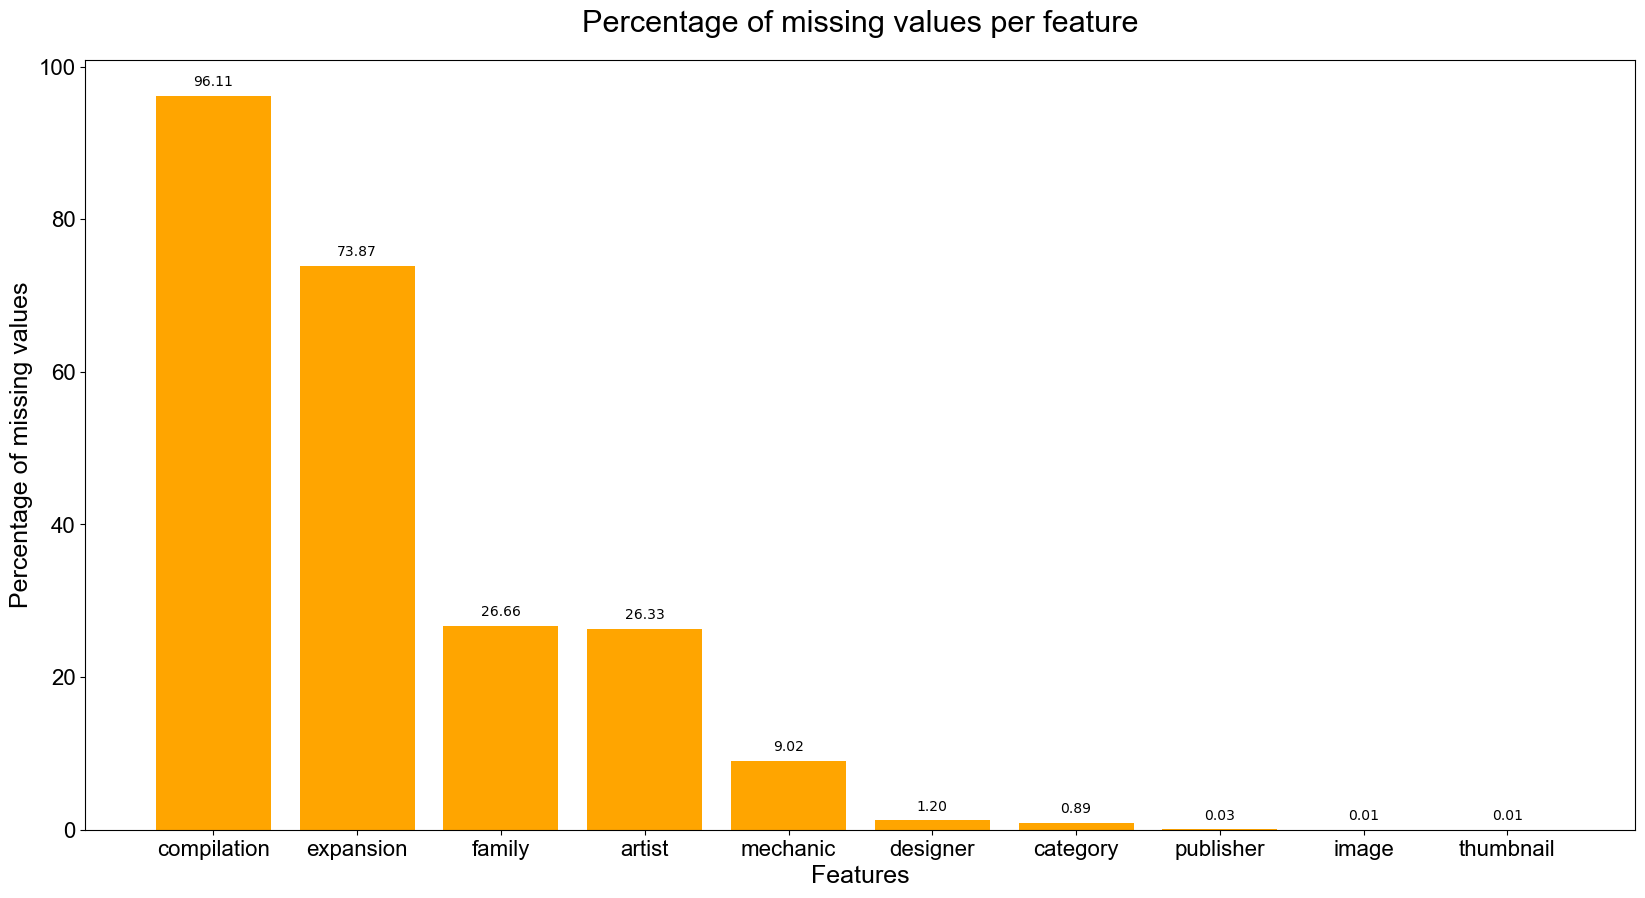

In [17]:
# Plotting the percentage of missing values per feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)
df_na = df_na[df_na[0] > 0]

fig, na = plt.subplots(figsize = (20, 10))

plot_na = na.bar(df_na.index, df_na.values.T[0], color = 'orange')

na.bar_label(plot_na, label_type = 'edge', fmt = '%.2f', padding = 5)

plt.title('Percentage of missing values per feature', fontname = 'Arial', fontsize = 22, pad = 20)
plt.xlabel('Features', fontname = 'Arial', fontsize = 18)
plt.ylabel('Percentage of missing values',  fontname = 'Arial', fontsize = 18)
plt.xticks(fontname = 'Arial', fontsize = 16)
plt.yticks(fontname = 'Arial', fontsize = 16);

> In this case I chose bar plot because you may quickly compare the degree of missing values across several attributes. This aids in prioritizing which attributes might require imputation or additional research. Furthermore, bar plots are simple to read and comprehend.

> I've also put the values above each bar to make it easier to interpret each variable shown.

> The color orange was chosen as a sign of attention, as we are dealing with a significant number of missing values.

In [18]:
# Replacing the NaNs with "Unknown"

df2 = df.fillna('Unknown')
df2.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political     Unknown   
1                   Bob Pepper               Card Game,Fantasy     Unknown   
2              Franz Vohwinkel      Abstract Strategy,Medieval     Unknown   
3                      Unknown                         Ancient     Unknown   
4  Scott Okumura,Peter Whitley                        Economic     Unknown   

                designer expansion  \
0     Karl-Heinz Schmiel   Unknown   
1  G. W. "Jerry" D'Arcey   Unknown   
2          Reiner Knizia   Unknown   
3      Christian Beierer   Unknown   
4            Sid Sackson   Unknown   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

> "Unknown" is frequently applied to categorical data as is considered a distinct category. As I can see from the last graph, all the missing data is concentrated in the categorical variables.

In [19]:
# Checking if there are any missing values

df2.isna().values.any()

False

### Data Visualization

> I chose primary colors for this part of the visualization because it attracts the reader's attention, makes it easier to see the information, and contributes to the visual balance and spatial distribution of the graphic elements. The use of different colors can also indicate playfulness, as this is a dataset of games for all ages.

> Skyblue, green and salmon are somewhat colorblind-friendly options since they can be distinguished by people who suffer from common types of color vision impairment.

> Because Arial tends to be more readable on displays and in a range of sizes, I chose it for data visualization. I also chose the Arial font because it is a recognized font in any international scientific journal. The font Arial is impartial and uncomplicated. Without calling too much attention to the typeface itself, its simplicity makes it suited for a variety of applications and data presentation approaches.

> I chose the font size of my graphics based on my own experience in the classroom and at conferences. My eyesight is very impaired and I can't see the labels on the graphs when the font is too small (like 10 or 12 for example) and this has happened a lot in the classroom. So I've adapted all my graphics to suit my vision and that of other people who can't see far away.

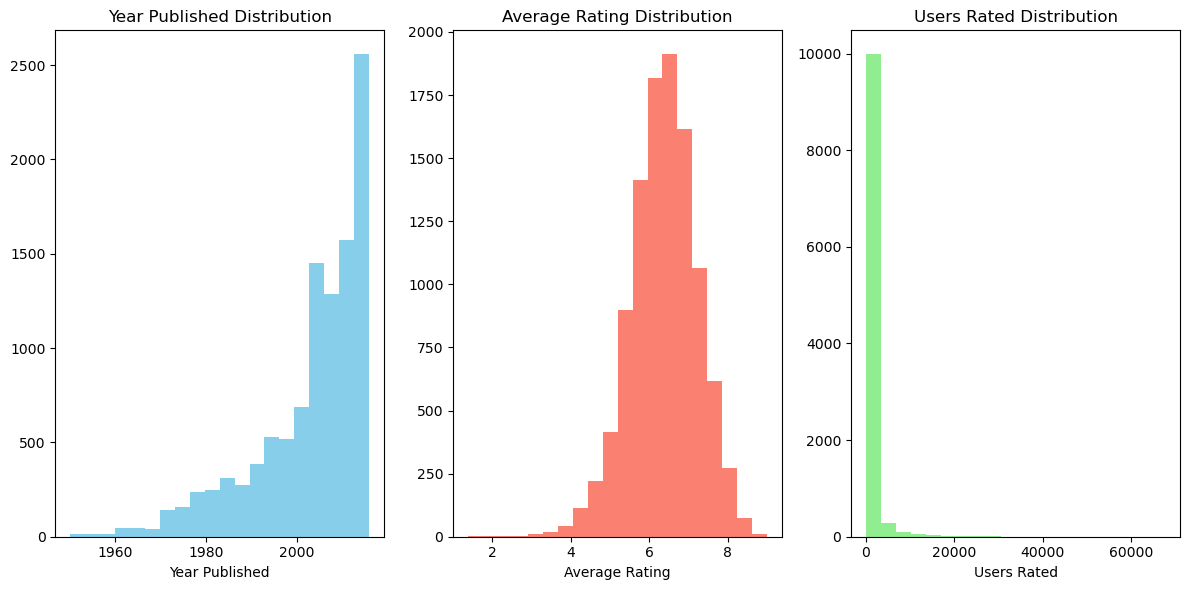

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df2['year_published'], bins=20, color='skyblue')
plt.title('Year Published Distribution')
plt.xlabel('Year Published')

plt.subplot(1, 3, 2)
plt.hist(df2['average_rating'], bins=20, color='salmon')
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')

plt.subplot(1, 3, 3)
plt.hist(df2['users_rated'], bins=20, color='lightgreen')
plt.title('Users Rated Distribution')
plt.xlabel('Users Rated')

plt.tight_layout()
plt.show()

> I plotted histograms because show the distribution of numerical data in a way that is easily understood via visual means. It provides insights into data concentration and probable outliers, assisting you in determining which ranges include more data points. The histogram's form can be used to identify skewness (asymmetry). It offers a succinct summary of the numerical data, allowing readers to rapidly understand the distribution's important features without having to look at the raw data in great detail.

> 'Year_published' has a left-skewed distribution, 'Average_Rating' seems to have a normal distribution, and 'Users_Rated' has a right-skewed distribution.

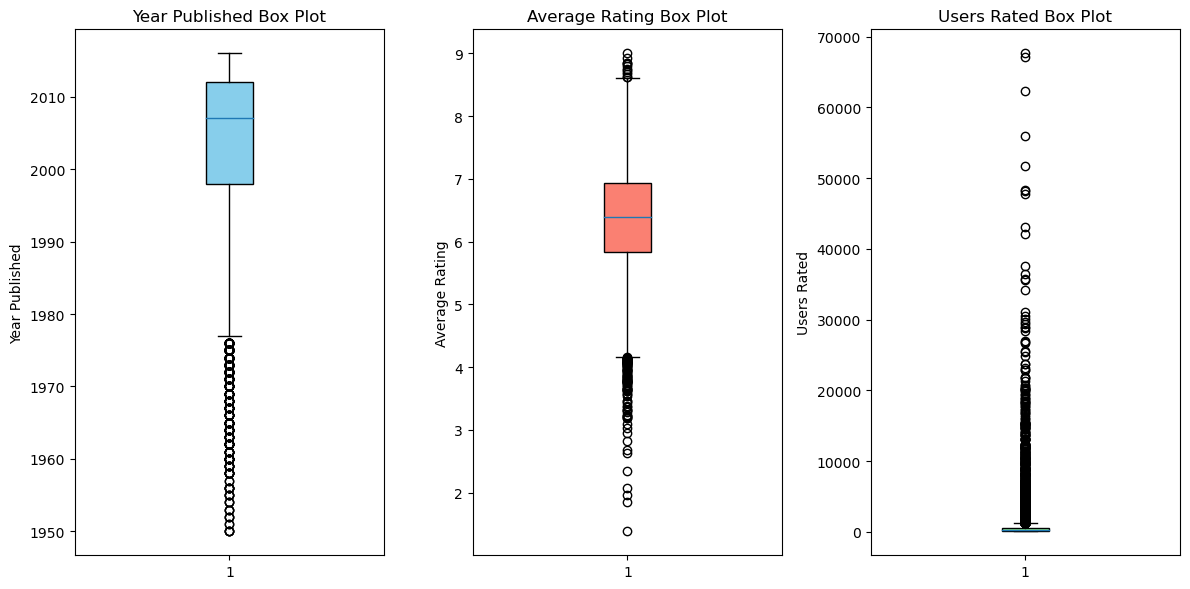

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df2['year_published'], patch_artist=True, boxprops={'facecolor': 'skyblue'})
plt.title('Year Published Box Plot')
plt.ylabel('Year Published')

plt.subplot(1, 3, 2)
plt.boxplot(df2['average_rating'], patch_artist=True, boxprops={'facecolor': 'salmon'})
plt.title('Average Rating Box Plot')
plt.ylabel('Average Rating')

plt.subplot(1, 3, 3)
plt.boxplot(df2['users_rated'], patch_artist=True, boxprops={'facecolor': 'lightgreen'})
plt.title('Users Rated Box Plot')
plt.ylabel('Users Rated')

plt.tight_layout()
plt.show()

> Although histograms and boxplots have comparable functions, they provide different perspectives on the data. I created a boxplot in order to depict and examine a numerical variable's distribution, central tendency, and spread graphically.

> The outliers will not be removed or treated.

> A board game's release year is indicated by the value "year_published." In this context, outliers could correspond to uncommon or historically significant board games. Getting rid of such outliers can mean losing important data.

> 'Users_rated' outliers may signify incredibly well-liked or specialized board games. Understanding which games have received considerable attention or have stayed largely unnoticed can be greatly aided by these outliers.

### Correlation Analysis

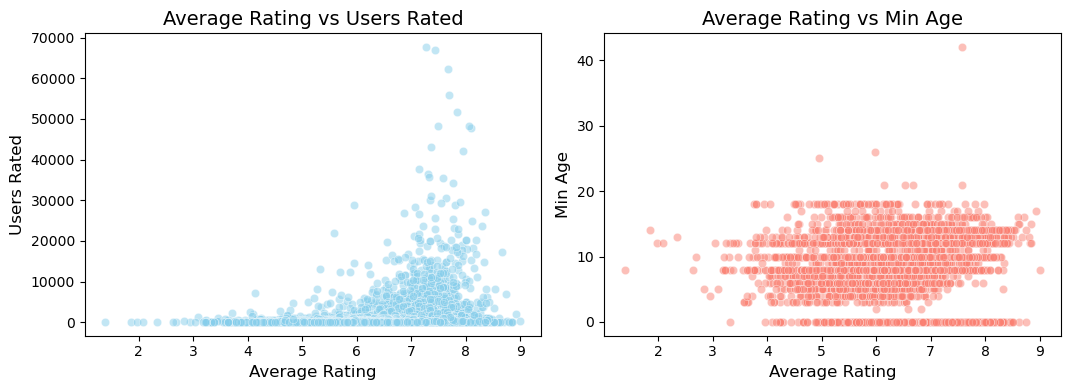

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Subplot 1: Average Rating vs Users Rated
sns.scatterplot(data=df2, x='average_rating', y='users_rated', ax=axes[0], color='skyblue', alpha=0.5)
axes[0].set_title('Average Rating vs Users Rated', fontsize=14)
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Users Rated', fontsize=12)

# Subplot 2: Average Rating vs Min Age
sns.scatterplot(data=df2, x='average_rating', y='min_age', ax=axes[1], color='salmon', alpha=0.5)
axes[1].set_title('Average Rating vs Min Age', fontsize=14)
axes[1].set_xlabel('Average Rating', fontsize=12)
axes[1].set_ylabel('Min Age', fontsize=12)

# Remove the third empty subplot
fig.delaxes(axes[2])

plt.tight_layout()

plt.show()

> I explored, visualized, and evaluated the relationship, correlations, or patterns between my two variables using a scatter plot. It is a flexible visualization tool that offers insightful understanding into my data and is particularly useful when working with continuous data.

> I chose scatter plot because it is the best option for showing the association between two variables. However, due to the number of datapoints, it is very difficult to understand the pattern.

> The weak correlation between the variables is clear in both graphs, if you look at the way the points are scattered. In this way, the scatter plot can also give you an initial idea of the correlation between numerical variables.

> 'average_rating' and 'users_rated' have a correlation coefficient of 0.23, which suggests a linear relationship between the two variables that is positive but but relatively weak. The same happened with the correlation between 'average_rating' and 'min_age'.

> The colors 'skyblue' and'salmon' stand out and contrast sharply. This contrast improves the graph's clarity and makes it simpler for viewers to distinguish between different data points.

> Adjusted subplot spacing - plots may overlap and this problem is avoided and the visibility of the data points is ensured by appropriate spacing.

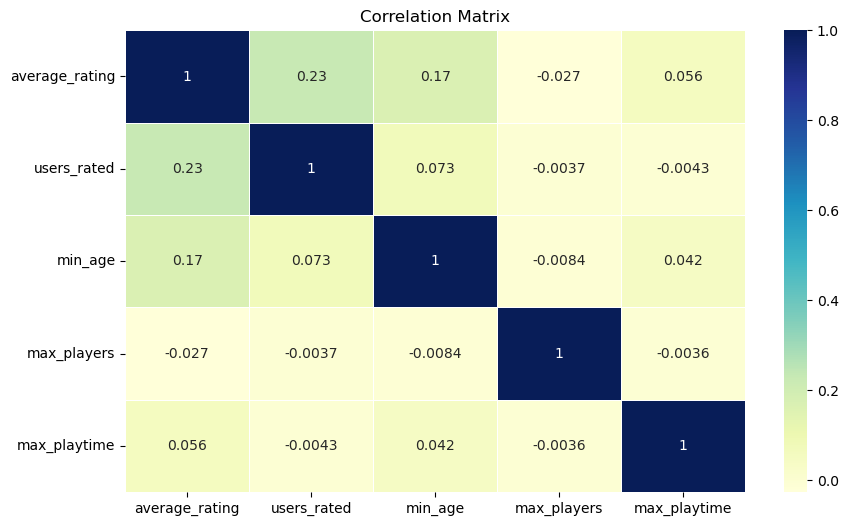

In [23]:
correlation_matrix = df2[['average_rating', 'users_rated', 'min_age', 'max_players', 'max_playtime']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> In data exploration and analysis, it is crucial to visually represent a correlation matrix. It offers a potent tool for comprehending data relationships, which can help with feature selection, modeling choices, and data cleansing. It is another way of showing the correlation between variables and making it clear how strong or weak this relationship is through a numerical visualization.

## Part 1

### 1. What are the top 5 "average rated" games?

> To answer this question I will use Pandas DataFrame method for sorting the df2 and I will arrange the rows in decreasing order of 'average_rating' values, from highest to lowest.

In [24]:
top_5 = df2.sort_values(by = 'average_rating', ascending = False)
top_5.head()

game_id                                        description  \
8348   140135  Small World's Designer Edition is a spare-no-e...   
6392    55690  Kingdom Death: Monster is a fully cooperative ...   
9964   181289  Terra Mystica: Big Box, a Korean crowdfunding ...   
8526   144574  (from MMP website:)&#10;&#10;Last Chance for V...   
9675   173504  The Greatest Day: Sword, Juno, and Gold Beache...   

                                             image  max_players  max_playtime  \
8348  //cf.geekdo-images.com/images/pic2270432.jpg            6            80   
6392  //cf.geekdo-images.com/images/pic2931007.jpg            6           180   
9964  //cf.geekdo-images.com/images/pic2602334.jpg            5           150   
8526  //cf.geekdo-images.com/images/pic1875530.jpg            2            60   
9675  //cf.geekdo-images.com/images/pic2422496.jpg            8          6000   

      min_age  min_players  min_playtime  \
8348        8            2            40   
6392       17            1            60   
9964       12            2            60   
8526       15            2            60   
9675       12            2            60   

                                                 name  playing_time  ...  \
8348                     Small World Designer Edition            80  ...   
6392                           Kingdom Death: Monster           180  ...   
9964                           Terra Mystica: Big Box           150  ...   
8526                          Last Chance for Victory            60  ...   
9675  The Greatest Day: Sword, Juno, and Gold Beaches          6000  ...   

                               artist  \
8348   Miguel Coimbra,Cyrille Daujean   
6392         Lokman Lam,Lorinda Tomko   
9964                  Dennis Lohausen   
8526  Dean Essig,Gettysburg Cyclorama   
9675                   Nicolás Eskubi   

                                               category  \
8348            Civilization,Fantasy,Territory Building   
6392  Adventure,Fantasy,Horror,Mature / Adult,Miniat...   
9964   Civilization,Economic,Fantasy,Territory Building   
8526               American Civil War,Civil War,Wargame   
9675                               Wargame,World War II   

                                            compilation  \
8348  Small World,Small World: 6 Player Board,Small ...   
6392                                            Unknown   
9964            Terra Mystica,Terra Mystica: Fire & Ice   
8526                                            Unknown   
9675                                            Unknown   

                             designer  \
8348                Philippe Keyaerts   
6392                       Adam Poots   
9964  Jens Drögemüller,Helge Ostertag   
8526                       Dean Essig   
9675                Adam Starkweather   

                                              expansion  \
8348                                            Unknown   
6392  Kingdom Death: Monster – A Strange Spot and Be...   
9964                                            Unknown   
8526                                            Unknown   
9675                                            Unknown   

                                                 family  \
8348              Crowdfunding: Kickstarter,Small World   
6392  Campaign Games,Crowdfunding: Kickstarter,Kingd...   
9964                                      Terra Mystica   
8526                              Line of Battle Series   
9675                              Grand Tactical Series   

                                               mechanic  \
8348  Area Control / Area Influence,Area Movement,Di...   
6392  Co-operative Play,Dice Rolling,Grid Movement,R...   
9964      Route/Network Building,Variable Player Powers   
8526                       Dice Rolling,Hex-and-Counter   
9675                                   Chit-Pull System   

                                        publisher average_rating users_rated  
8348                               Days 

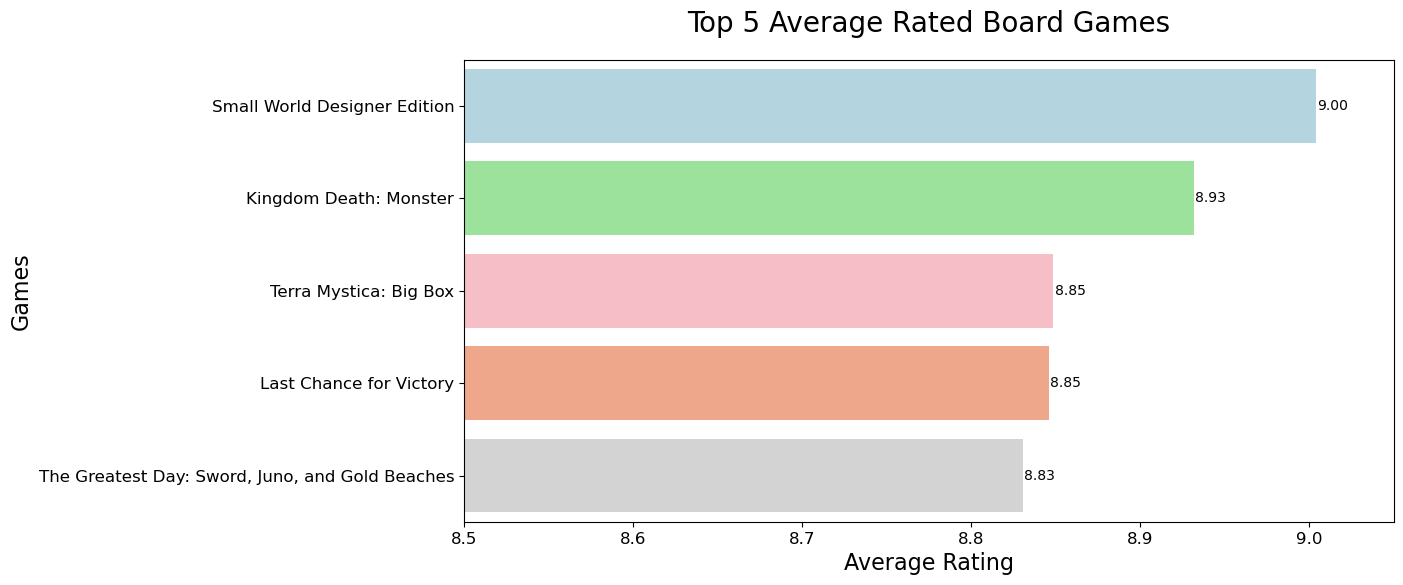

In [25]:
plt.figure(figsize=(12, 6))


colors = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon', 'lightgray']


sns.barplot(data=top_5.head(), x='average_rating', y='name', palette=colors)

plt.title('Top 5 Average Rated Board Games', fontsize=20, pad=20)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Games', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center', va='center', fontsize=10, color='black', xytext=(12, 0),
                      textcoords='offset points')

plt.xlim(8.5, 9.05)  

plt.show()

> Because some board game titles might be fairly long, it is possible to display them horizontally so that the entire titles are seen without being cut off. This makes sure that viewers can quickly recognize the games.

> In a plot, different light colors aid in highlighting different data points or groups. It makes it simpler for viewers to distinguish between distinct bars or data points. Using contrasting colors helps prevent misinterpretation.

> The color schemes are intended to establish a balance between clarity and attractiveness. The distinction in colors serves to highlight each game's rating while the light hues serve as a beautiful backdrop.

> Figure with a larger size for clarity; color palette with different light colors; and add labels next to each bar.

### 2. Is there a correlation between the “users_rated” and the “max_playtime”?

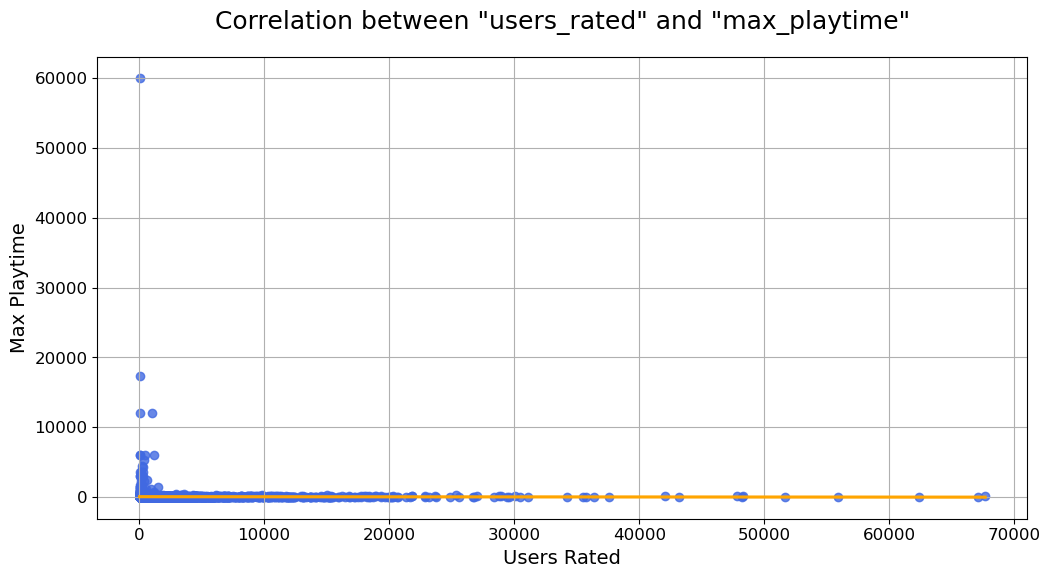

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(data=df2, x='users_rated', y='max_playtime', scatter_kws={'color': 'royalblue'}, line_kws={'color': 'orange'}, ax=ax)

# Set title and labels
ax.set_title('Correlation between "users_rated" and "max_playtime"', fontsize=18, pad=20)
ax.set_xlabel('Users Rated', fontsize=14)
ax.set_ylabel('Max Playtime', fontsize=14)

# Set tick label fonts
ax.tick_params(axis='both', labelsize=12)

ax.grid(True)

plt.show()

> Used Seaborn's regplot to create a scatterplot with a regression line, which presents the association in a more illuminating way.

> To make it easier to analyze data points, draw grid lines.

> The scatter plot's line provides the data with additional quantitative and graphical information. I used because facilitates numerous analytical tasks by serving to quantify, comprehend, and express the relationship between variables.

> 'Royalblue' and 'orange' offer a striking color contrast. The contrast enhances the graph's clarity by making it simpler to discern between the scatter points and the regression line.

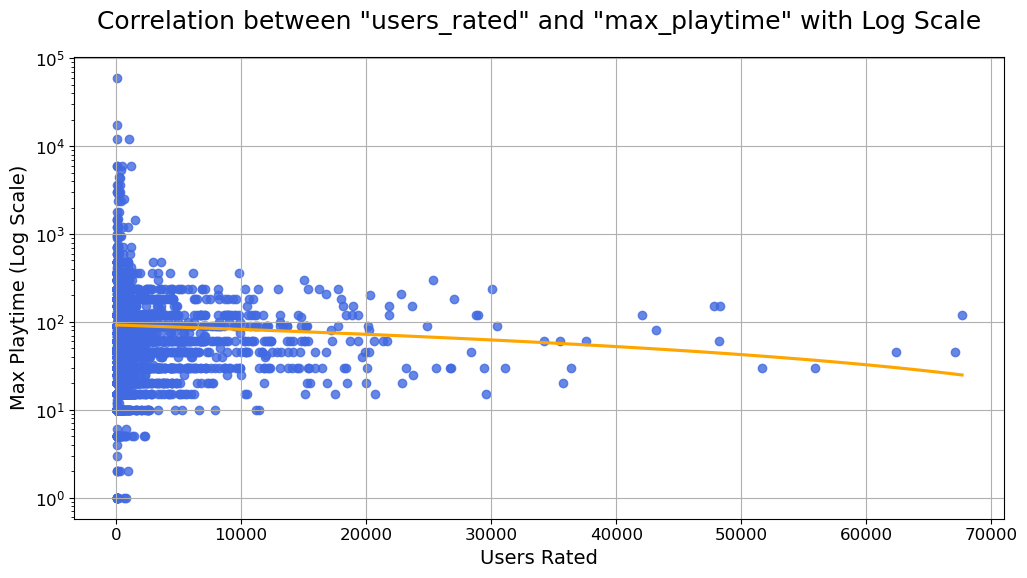

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(data=df2, x='users_rated', y='max_playtime', ci=None, scatter_kws={'color': 'royalblue'}, line_kws={'color': 'orange'}, ax=ax)

# Set a log scale for the y-axis
ax.set_yscale('log')

# Set title and labels
ax.set_title('Correlation between "users_rated" and "max_playtime" with Log Scale', fontsize=18, pad=20)
ax.set_xlabel('Users Rated', fontsize=14)
ax.set_ylabel('Max Playtime (Log Scale)', fontsize=14)

# Set tick label fonts
ax.tick_params(axis='both', labelsize=12)

ax.grid(True)

plt.show()

> I chose to make this graph to improve the arrangement of the datapoints and thus improve the interpretation of the graph.

> The graph essentially "scales down" the larger numbers by using a logarithmic scale on the y-axis, which clarifies data linkages and draws attention to patterns that would not be as obvious on a linear scale.

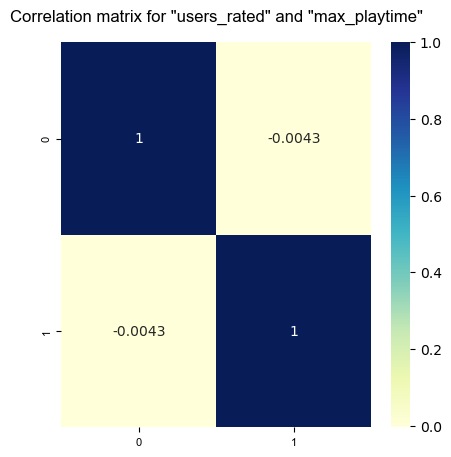

In [28]:
# Plotting a heatmap to check the correlation between “users_rated” and “max_playtime”

fig = plt.gcf()
fig.set_size_inches(5, 5)

sns.heatmap(np.corrcoef(df2['users_rated'], df2['max_playtime']), annot = True, cmap = 'YlGnBu')

plt.title('Correlation matrix for "users_rated" and "max_playtime"',
          fontname = 'Arial', fontsize = 12, pad = 15)
plt.xticks(fontname = 'Arial', fontsize = 8)
plt.yticks(fontname = 'Arial', fontsize = 8);

> I followed the same reasoning as in the previous matrix - I tried to show the relationship between the variables in numerical form.

### 3. What is the distribution of game categories?

> Let's check firts the total of unique values in the column "category" and then check the count of each value in the column "category".

In [29]:
df2['category'].nunique()
print('There are a total of ' + (str(df2['category'].nunique()) + ' unique values in the category variable.'))

There are a total of 3861 unique values in the category variable.


In [30]:
df2['category'].value_counts()

Wargame,World War II                                                                    449
Card Game                                                                               438
Abstract Strategy                                                                       284
Napoleonic,Wargame                                                                      124
Economic                                                                                116
                                                                                       ... 
Book,Fantasy,Miniatures                                                                   1
Adventure,Card Game,Fantasy,Humor,Movies / TV / Radio theme                               1
Card Game,Deduction,Print & Play                                                          1
Card Game,Collectible Components,Comic Book / Strip,Science Fiction,Video Game Theme      1
Bluffing,Horror,Maze,Movies / TV / Radio theme,Science Fiction                  

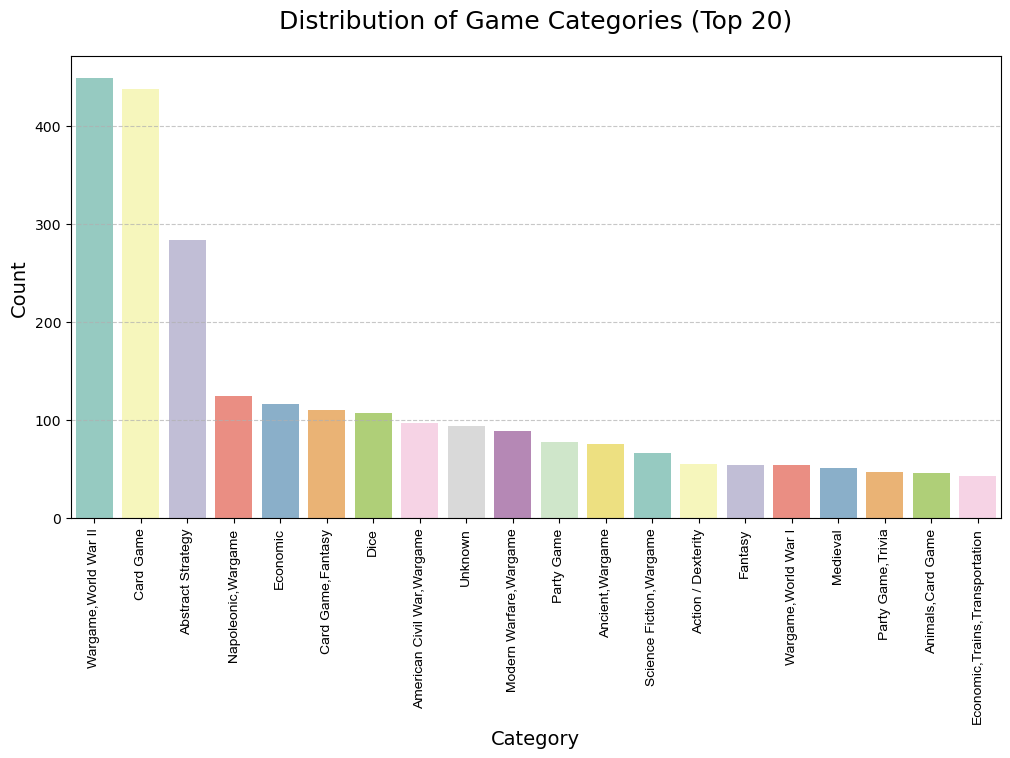

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

top_categories = 20  
categories_to_display = df2['category'].value_counts().nlargest(top_categories).index

# Filter the data to include only the top categories
filtered_data = df2[df2['category'].isin(categories_to_display)]

sns.countplot(data=filtered_data, x='category', order=categories_to_display, palette='Set3', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontname='Arial', fontsize=10)

# Set title and labels
ax.set_title('Distribution of Game Categories (Top 20)', fontsize=18, pad=20)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set tick label fonts
ax.tick_params(axis='both', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

> I've selected the top 20 categories because I think that's enough to demonstrate them graphically.

> I chose Set3 color scheme because is intended to be both aesthetically beautiful and approachable. It can make for an interesting and colorful plot. This palette offers a range of colors that work well with categorical data.

> I believe that the distribution using bar graphs is the best way to show the categories in question, because this way it is clear what you want to show.

> I've placed the caption vertically to make it easier to understand the names and to avoid the names being on top of each other.

> I put the values above each bar but it wasn't presentable, so I decided to make a table with my top 20 with their respective values (see below).

In [32]:
# Assuming you have already calculated and stored the top 10 categories and their counts
top_20_categories = df2['category'].value_counts().nlargest(20)

# Create a DataFrame
top_categories_df = pd.DataFrame({
    'Category': top_20_categories.index,
    'Count': top_20_categories.values
})

# Display the DataFrame
print(top_categories_df)

                          Category  Count
0             Wargame,World War II    449
1                        Card Game    438
2                Abstract Strategy    284
3               Napoleonic,Wargame    124
4                         Economic    116
5                Card Game,Fantasy    110
6                             Dice    107
7       American Civil War,Wargame     97
8                          Unknown     94
9           Modern Warfare,Wargame     89
10                      Party Game     77
11                 Ancient,Wargame     75
12         Science Fiction,Wargame     66
13              Action / Dexterity     55
14                         Fantasy     54
15             Wargame,World War I     54
16                        Medieval     51
17               Party Game,Trivia     47
18               Animals,Card Game     46
19  Economic,Trains,Transportation     43


### 4. Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

> I created a new dataframe with the columns "year_published" and "average_rating", sorted by year. After that, i got the average rating per year.

In [33]:
df_new = df2[['year_published', 'average_rating']].sort_values(by = 'year_published', ascending = True)
df_new

year_published  average_rating
2688             1950         5.46696
2074             1950         6.00230
3133             1950         6.54225
2463             1950         5.02264
662              1951         6.79954
...               ...             ...
10111            2016         7.30039
10113            2016         7.34831
10114            2016         7.52241
8861             2016         8.22778
10531            2016         7.52941

[10532 rows x 2 columns]

In [34]:
df_new_mean = df_new.groupby('year_published', as_index = False).agg({'average_rating': 'mean'})
df_new_mean

year_published  average_rating
0             1950        5.758538
1             1951        5.711550
2             1952        5.680623
3             1953        4.639980
4             1954        5.654670
..             ...             ...
62            2012        6.557838
63            2013        6.604258
64            2014        6.739433
65            2015        6.871425
66            2016        7.097521

[67 rows x 2 columns]

> I obtained the average rating for games published before 1993 and from this year on.

In [35]:
df_new_mean_older = df_new[(df_new['year_published'] <= 1992)]
df_new_mean_newer = df_new[1992 < (df_new['year_published'])]

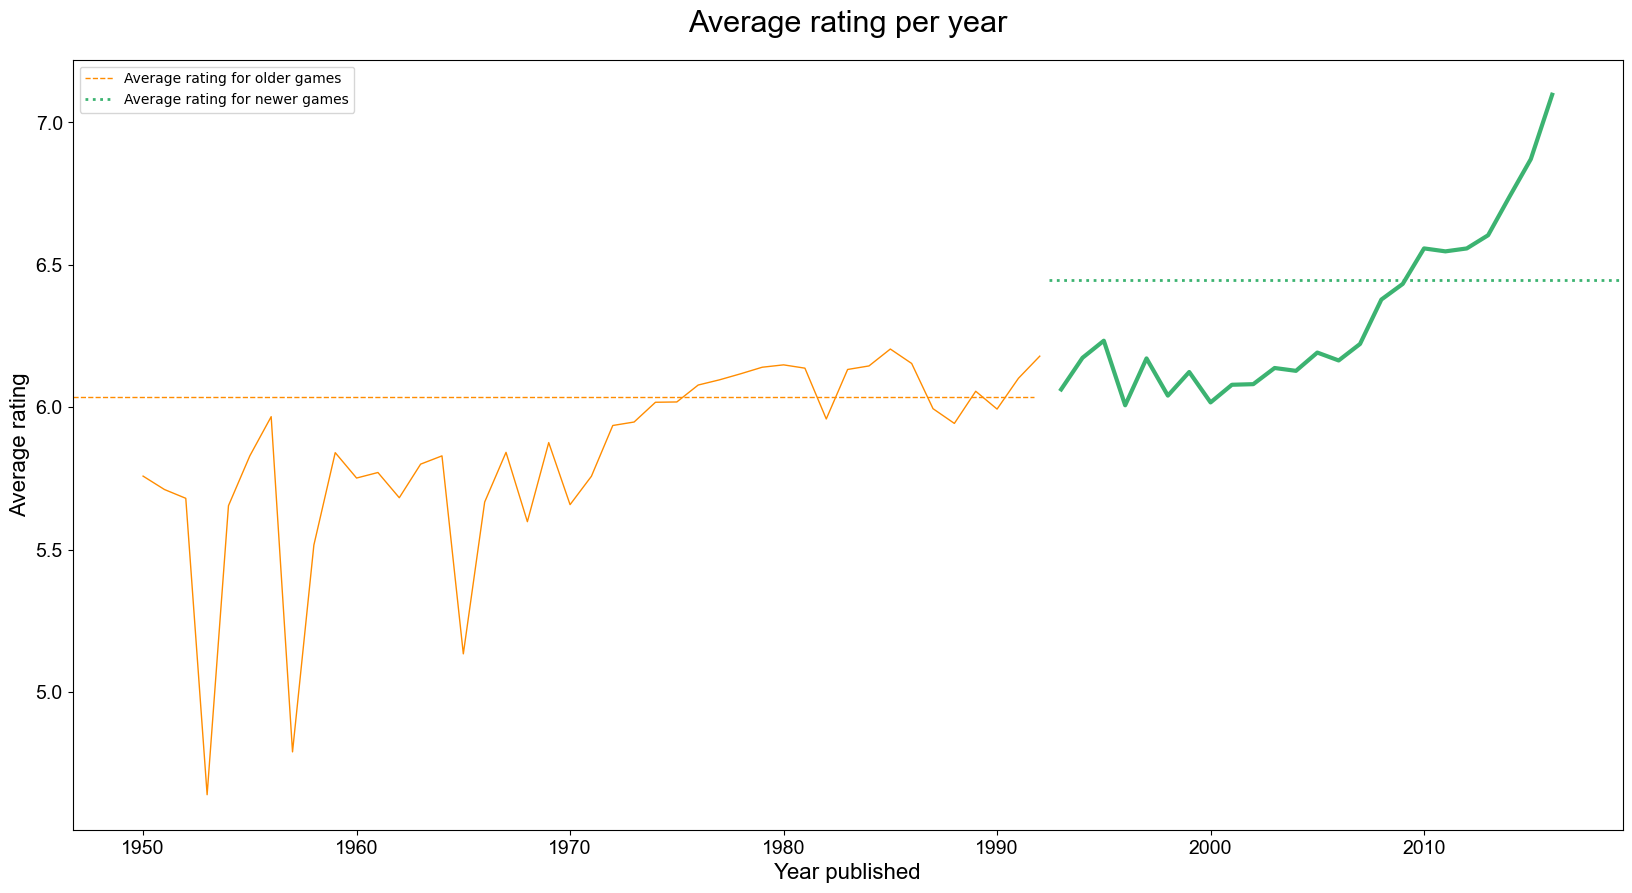

In [36]:
# Plotting the average rating per year: oder games vs newer games

fig = plt.gcf()
fig.set_size_inches(20, 10)

ax = sns.lineplot(data = df_new_mean_older, x = 'year_published', y = 'average_rating', color = 'darkorange', ci = None,
                 linewidth = 1)
ax.axhline(y = df_new_mean_older['average_rating'].mean(), color = 'darkorange', ls = '--', lw = 1, xmax = 0.62,
           label = 'Average rating for older games')

ax = sns.lineplot(data = df_new_mean_newer, x = 'year_published', y = 'average_rating', color = 'mediumseagreen', ci = None,
                 linewidth = 3)
ax.axhline(df_new_mean_newer['average_rating'].mean(), color = 'mediumseagreen', ls = ':', lw = 2, xmin = 0.63,
           label = 'Average rating for newer games')

plt.title('Average rating per year', fontname = 'Arial', fontsize = 22, pad = 20)
plt.xlabel('Year published', fontname = 'Arial', fontsize = 16)
plt.ylabel('Average rating', fontname = 'Arial', fontsize = 16)
plt.xticks(fontname = 'Arial', fontsize = 14)
plt.yticks(fontname = 'Arial', fontsize = 14)
plt.legend();

> I plotted this graph because it makes it easier to see how a continuous variable (average rating) evolves over a continuous span of time (years), a line plot is an appropriate choice for illustrating the average rating each year. Each year's data points are connected by a line, which enables us to spot trends, patterns, and changes in average ratings over time. Additionally, the lineplot makes it simple to compare ratings from one year to the next.

> Furthermore, it's very clear just by looking at the visualization which group has the highest average rating. Making the graph self-explanatory is also a very important property to keep in mind.

> The two hues, "darkorange" and "mediumseagreen," stand out from one another. This contrast makes it evident that the two lines in the graph reflect different data series and makes it easier for viewers to discern between the two lines in the graph.

> The chosen colors ensure that the data points and lines stand out without causing visual discomfort because they are well visible against the background and are not overbearing or bright.

In [37]:
print('The average rating for older games is ' + (str(round(
    df_new['average_rating'][(df_new['year_published'] <= 1992)].mean(), 2)) + '.'))

print('The average rating for newer games is ' + (str(round(
    df_new['average_rating'][1992 < (df_new['year_published'])].mean(), 2)) + '.'))

The average rating for older games is 6.04.
The average rating for newer games is 6.45.


> Newer games have a higher MEAN “average rating” than older games.

### 5. What are the 5 most common “mechanics” in the dataset?

In [38]:
# Checking the total of unique values in the column "mechanic"

df2['mechanic'].nunique()
print('There are a total of ' + (str(df2['mechanic'].nunique()) + ' unique values in the category variable.'))

There are a total of 3210 unique values in the category variable.


In [39]:
# Checking the count of each value in the column "mechanic"

df2['mechanic'].value_counts()

Unknown                                                                                                   950
Hex-and-Counter                                                                                           523
Hand Management                                                                                           297
Dice Rolling                                                                                              222
Roll / Spin and Move                                                                                      199
                                                                                                         ... 
Auction/Bidding,Hand Management,Variable Phase Order,Voting                                                 1
Route/Network Building,Simulation,Stock Holding                                                             1
Action Point Allowance System,Dice Rolling,Press Your Luck,Variable Phase Order,Variable Player Powers      1
Hand Manag

In [40]:
# Count the occurrences of each mechanic and exclude "Unknown"
mechanic_counts = df2[df2['mechanic'] != 'Unknown']['mechanic'].value_counts()

# Select the top 5 mechanics
top_5_mechanics = mechanic_counts.head(5)

# Print the top 5 mechanics
print(top_5_mechanics)

Hex-and-Counter         523
Hand Management         297
Dice Rolling            222
Roll / Spin and Move    199
Tile Placement          170
Name: mechanic, dtype: int64


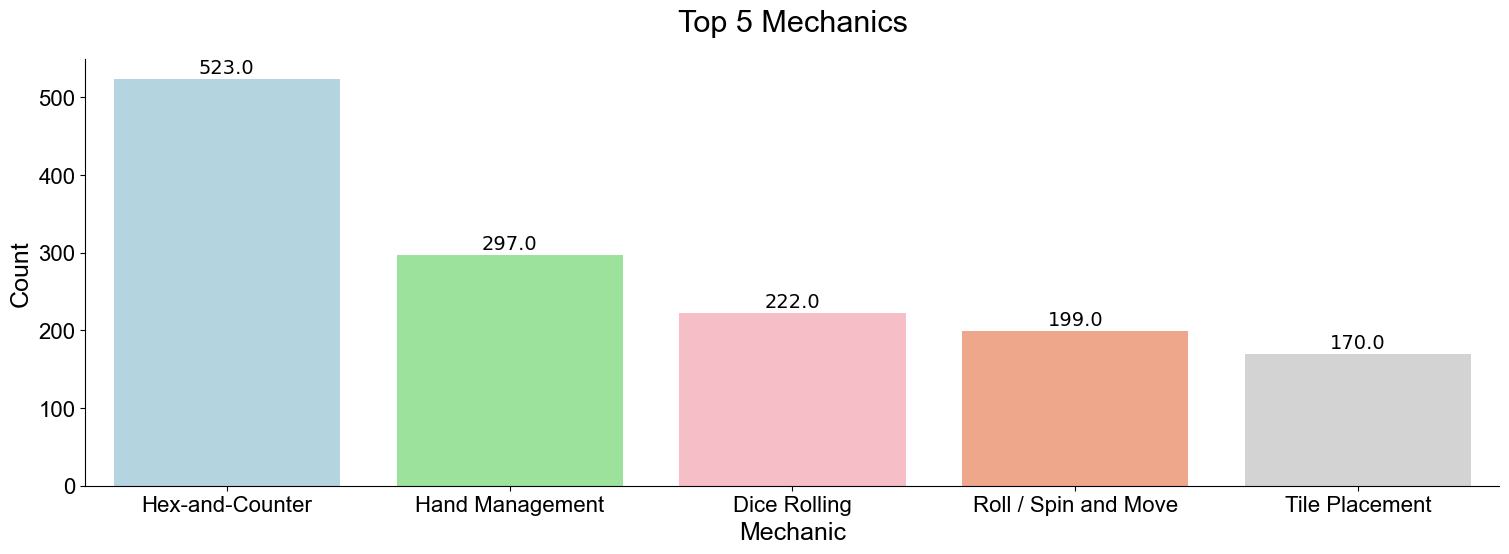

In [41]:
# Data for the top 5 mechanics
top_5_mechanics_data = {
    'Mechanic': ['Hex-and-Counter', 'Hand Management', 'Dice Rolling', 'Roll / Spin and Move', 'Tile Placement'],
    'Count': [523, 297, 222, 199, 170]
}

top_5_mechanics_df = pd.DataFrame(top_5_mechanics_data)

# Create a catplot
top5_mec = sns.catplot(data=top_5_mechanics_df, x='Mechanic', y='Count', kind='bar', height=5, aspect=3,
                      palette=['lightblue', 'lightgreen', 'lightpink', 'lightsalmon', 'lightgray'])

# Set plot titles and labels
plt.title('Top 5 Mechanics', fontname='Arial', fontsize=22, pad=20)
plt.xlabel('Mechanic', fontname='Arial', fontsize=18)
plt.ylabel('Count', fontname='Arial', fontsize=18)
plt.xticks(fontname='Arial', fontsize=16)
plt.yticks(fontname='Arial', fontsize=16)

# Add data labels on top of bars
for p in top5_mec.ax.patches:
    top5_mec.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 8),
                        textcoords='offset points')

# Show the plot
plt.show()

> To compare categorical data (in this case, mechanics) effectively, bar graphs are useful in this situation. They make it simple to understand how different mechanics' counts differ from one another. Each mechanics is represented by a bar, and the observer may rapidly assess which mechanics are most prevalent by comparing the heights of these bars.

> To make visualization even easier and more efficient (bars can be confusing depending on the height between them), I've added the values above each bar.

> The choice of colors follows the same pattern as mentioned above. In addition, following the same pattern makes the aesthetics of the work more presentable.

## Part 2

### 6. How has user engagement ("users_rated" column) with board games changed over the years? Are there specific years or periods when user activity or ratings peaked or declined significantly?

> I chose this question primarily because I was thinking of an interactive image for my work and also because I was studying one of the documents posted on the college system and saw how important it was to show the evolution of a particular variable over time.

> Making informed judgments or adjusting your plans, products, or services may benefit from this information. We can spot peaks or troughs in user interest by keeping an eye on variations in the number of users who have rated the board games. A significant increase in user ratings may be attributed to the launching of a well-liked game, whereas a dip may indicate waning enthusiasm.

> Observing how the users_rated column evolves over time offers insightful information about user involvement, game popularity, and data patterns. User rating adjustments might offer input on game updates or modifications.

> User ratings increased gradually between 1950 and 2012, with sporadic fluctuations. But starting in 2012, there was a noticeable drop, and this pattern persisted until 2016.

> I extracted the publication year from the 'year_published' column and then grouped and aggregated the data to calculate user engagement per year.

In [42]:
df2['year_published'] = df2['year_published'].astype(str).str[:4].astype(int)

user_engagement = df2.groupby('year_published')['users_rated'].sum().reset_index()

# Create a line plot with Plotly Express
fig = px.line(user_engagement, x='year_published', y='users_rated', title='User Engagement Over the Years',
              labels={'year_published': 'Year', 'users_rated': 'Total Users Rated'},
              line_shape='linear',  
              color_discrete_sequence=['navy']
)

fig.update_layout(
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    xaxis_tickfont=dict(size=12),
    yaxis_tickfont=dict(size=12),
    xaxis=dict(showgrid=False),  # Remove x-axis gridlines
    yaxis=dict(showgrid=False),  # Remove y-axis gridlines
    margin=dict(l=20, r=20, t=50, b=20)  # Adjust margins for better spacing
)

# Show the interactive plot
fig.show()

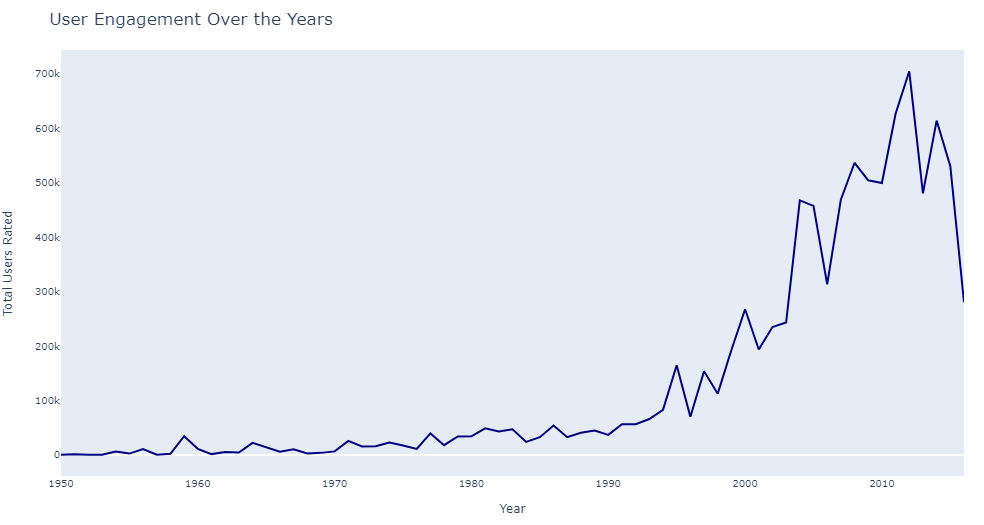

> Interactivity can be especially helpful in the case of a line plot over time. Users can pan across the data for a dynamic and interesting experience, zoom in on particular time periods, and hover on data points for more information.

> The interactive graph looks bigger than the image

> I used Navy blue because is a dark color that shines brightly against light backdrops, making it simple to see the plot's line.

> In order to ensure that the data is readily visible, navy blue can offer a nice contrast with other aspects of the graph, such as labels.

> I think that when you want to preserve a professional and classic look, navy blue is a safe and reliable option for displaying historical data patterns.

> I added the image because GitHub doesn't accept interactive graphics.

## References

1. Waskom, M. (2020). "Seaborn: Statistical Data Visualization." Retrieved from https://seaborn.pydata.org/

1. Plotly Technologies Inc. (2021). "Plotly Express: Easy-to-Use Data Visualization Library." Retrieved from https://plotly.com/python/plotly-express/